In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))

In [3]:
data = load_breast_cancer(return_X_y=False)

feauture_names = data['feature_names']
target_names = data['target_names']

X, y = data.data, data.target

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

Number of samples: 569
Number of features: 30


In [4]:
# Choose two features
feature_idx_1 = np.where(feauture_names == 'worst concave points')[0][0]
feature_idx_2 = np.where(feauture_names == 'worst area')[0][0]

X = X[:, [feature_idx_1, feature_idx_2]]
X.shape

(569, 2)

Text(0, 0.5, 'worst area')

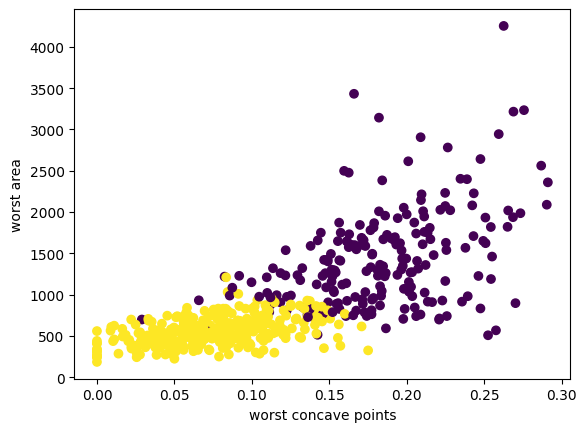

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('worst concave points')
plt.ylabel('worst area')

In [6]:
# Let's now split the data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(X_test.shape)

(426, 2)
(143, 2)


In [7]:
# Let's fit a logistic regression classifier
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=500)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [8]:
# Let's look at the fitted model parameters
weights = logreg_model.coef_[0]
bias = logreg_model.intercept_
print("Weights: ", weights)
print("Bias: ", bias)

Weights:  [-1.91903684 -0.01035385]
Bias:  [9.07253537]


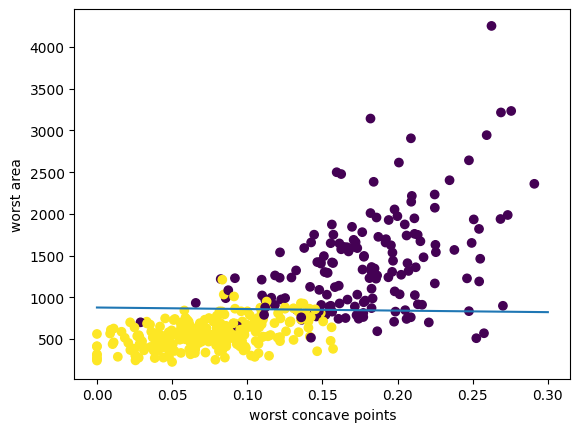

In [9]:
# Let's get the intercept and gradient of the decision boundary
# The decision boundary is given by y = weights*x + bias, such that y = 0.
# 0 = w0 * x0 + w1 * x1 + bias
dec_gradient = - weights[0] / weights[1]
dec_intercept = -bias / weights[1]

# Plot the decision boundary
x_plot = np.linspace(0, 0.30, 100)
y_plot = dec_gradient * x_plot + dec_intercept

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.xlabel('worst concave points')
plt.ylabel('worst area')
plt.plot(x_plot, y_plot)

In [10]:
# We now compute the accuracy of the model on the test set
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)

print(f"The model reached {accuracy: .4f} accuracy")

The model reached  0.9510 accuracy


/var/folders/g2/4mrkjrd143sdsyrjc7k7mz1w0000gn/T/ipykernel_18315/1085695802.py:4: RuntimeWarning: divide by zero encountered in log
  return (-1 / n_points) * np.sum(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba), axis=1)


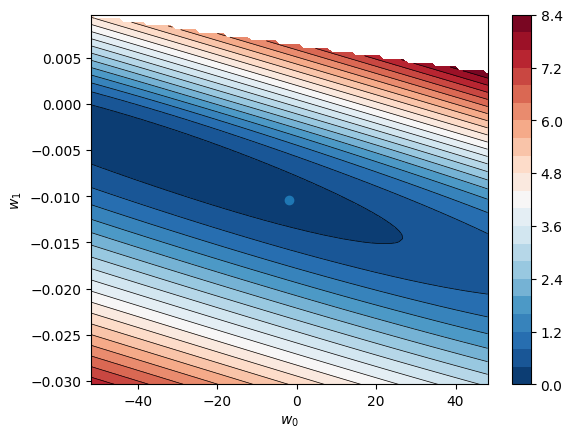

In [11]:
# Let's now visualize the loss surface that the model had to optimize on
def logistic_loss(y_true, y_proba):
    n_points = y_proba.shape[1]
    return (-1 / n_points) * np.sum(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba), axis=1)

def compute_loss_per_params(w1, w2):
    # Compute linear response
    y_proba = np.dot(np.atleast_2d(w1).T, np.atleast_2d(X_train[:, 0])) +\
              np.dot(np.atleast_2d(w2).T, np.atleast_2d(X_train[:, 1])) +\
              bias
    
    # Compute sigmoid activation
    y_proba = sigmoid(y_proba)

    # Compute logistic loss
    loss = logistic_loss(y_true=y_train, y_proba=y_proba)
    return loss

# We will create a 2D surface over the weight parameters
w1_points = np.linspace(weights[0] - 50, weights[0] + 50, 100)
w2_points = np.linspace(weights[1] - 0.02, weights[1] + 0.02, 100)

w1, w2 = np.meshgrid(w1_points, w2_points)

# For each combination of points we will compute the log loss
log_loss_surface = compute_loss_per_params(np.ravel(w1), np.ravel(w2))
log_loss_surface = log_loss_surface.reshape(w1.shape)

# Plot the loss surface
fig, ax = plt.subplots(1)

ax.contour(w1, w2, log_loss_surface, levels=20, linewidths=0.5, colors='k')
ctr1 = ax.contourf(w1, w2, log_loss_surface, levels=20, cmap="RdBu_r")

ax.plot(weights[0], weights[1], 'o')
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
fig.colorbar(ctr1, ax=ax)

In [12]:
# Normalize the inputs
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [13]:
# Let's now fit the model on the normalized inputs
logreg_norm_model = LogisticRegression(max_iter=100)
logreg_norm_model.fit(X_train_norm, y_train)

y_norm_pred = logreg_norm_model.predict(X_test_norm)

# Check accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_norm_pred):.4f}")

Accuracy: 0.9650


weights:  [-2.46421849 -3.34023239] bias:  [0.57717496]


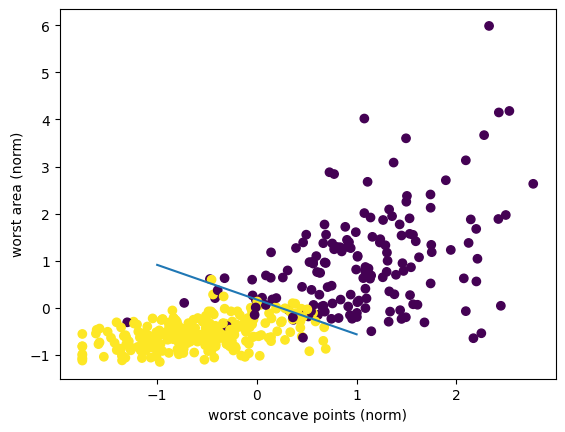

In [14]:
# Let's get the intercept and gradient of the decision boundary
# The decision boundary is given by y = weights*x + bias, such that y = 0.
# 0 = w0 * x0 + w1 * x1 + bias
norm_weights, norm_bias = logreg_norm_model.coef_[0], logreg_norm_model.intercept_
print("weights: ", norm_weights, "bias: ", norm_bias)

dec_gradient = - norm_weights[0] / norm_weights[1]
dec_intercept = - norm_bias / norm_weights[1]

# Plot the decision boundary
x_plot = np.linspace(-1, 1, 100)
y_plot = dec_gradient * x_plot + dec_intercept

plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train)
plt.xlabel('worst concave points (norm)')
plt.ylabel('worst area (norm)')
plt.plot(x_plot, y_plot)

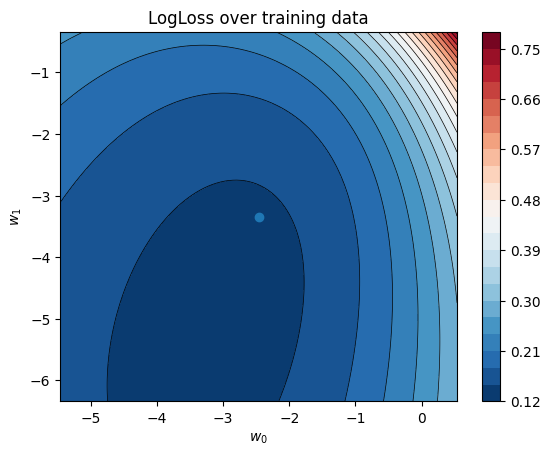

In [15]:
# Let's now visualize the loss surface that the model had to optimize on
def logistic_loss(y_true, y_proba):
    n_points = y_proba.shape[1]
    return (-1 / n_points) * np.sum(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba), axis=1)

def compute_loss_per_params(w1, w2):
    # Compute linear response
    y_proba = np.dot(np.atleast_2d(w1).T, np.atleast_2d(X_train_norm[:, 0])) +\
              np.dot(np.atleast_2d(w2).T, np.atleast_2d(X_train_norm[:, 1])) +\
              norm_bias
    
    # Compute sigmoid activation
    y_proba = sigmoid(y_proba)

    # Compute logistic loss
    loss = logistic_loss(y_true=y_train, y_proba=y_proba)
    return loss

w1_points = np.linspace(norm_weights[0] - 3, norm_weights[0] + 3, 100)
w2_points = np.linspace(norm_weights[1] - 3, norm_weights[1] + 3, 100)

w1, w2 = np.meshgrid(w1_points, w2_points)

# For each combination of points we will compute the log loss
log_loss_surface = compute_loss_per_params(np.ravel(w1), np.ravel(w2))
log_loss_surface = log_loss_surface.reshape(w1.shape)

# Plot the loss surface
fig, ax = plt.subplots(1)

ax.contour(w1, w2, log_loss_surface, levels=20, linewidths=0.5, colors='k')
ctr1 = ax.contourf(w1, w2, log_loss_surface, levels=20, cmap="RdBu_r")

ax.plot(norm_weights[0], norm_weights[1], 'o')
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_title("LogLoss over training data")
fig.colorbar(ctr1, ax=ax)

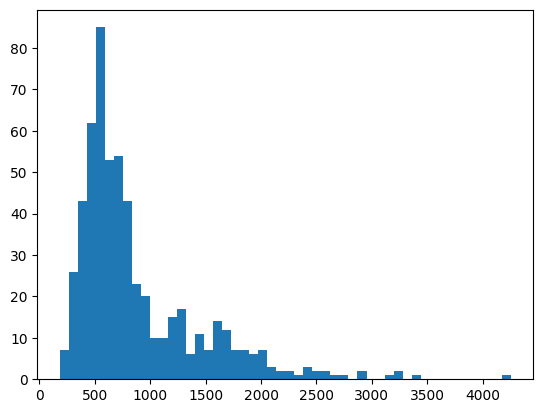

In [16]:
# Another trick is to realize that the feature `worst area` is always going to be a positive quantity.
# Let's look at its distribution.
_ = plt.hist(X[:, 1], bins=50)

In [17]:
# This looks more like a log-normal distribution. We can turn this into 
# a somewhat `normal` distribution by taking the log.
X_train[:, 1] = np.log(X_train[:, 1])
X_test[:, 1] = np.log(X_test[:, 1])

# Now we normalize
scaler = StandardScaler()

X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

# Fit and evaluate the model
logreg_norm_model = LogisticRegression()
logreg_norm_model.fit(X_train_norm, y_train)

y_norm_pred = logreg_norm_model.predict(X_test_norm)

# Check accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_norm_pred):.4f}")

Accuracy: 0.9720


weights:  [-2.42635122 -2.90180593] bias:  [1.25370947]


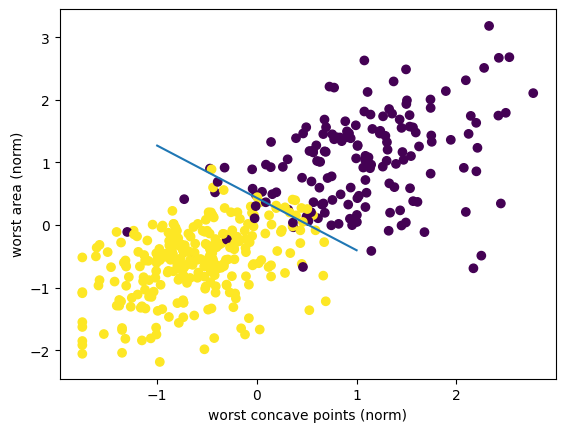

In [18]:
# Let's get the intercept and gradient of the decision boundary
# The decision boundary is given by y = weights*x + bias, such that y = 0.
# 0 = w0 * x0 + w1 * x1 + bias
norm_weights, norm_bias = logreg_norm_model.coef_[0], logreg_norm_model.intercept_
print("weights: ", norm_weights, "bias: ", norm_bias)

dec_gradient = - norm_weights[0] / norm_weights[1]
dec_intercept = - norm_bias / norm_weights[1]

# Plot the decision boundary
x_plot = np.linspace(-1, 1, 100)
y_plot = dec_gradient * x_plot + dec_intercept

plt.scatter(X_train_norm[:, 0], X_train_norm[:, 1], c=y_train)
plt.xlabel('worst concave points (norm)')
plt.ylabel('worst area (norm)')
plt.plot(x_plot, y_plot)

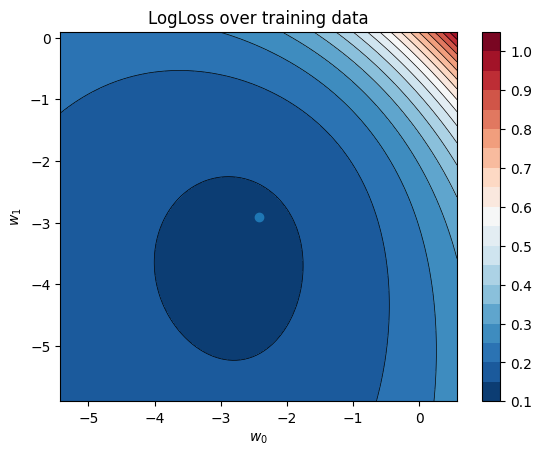

In [19]:
# Let's now visualize the loss surface that the model had to optimize on
def logistic_loss(y_true, y_proba):
    n_points = y_proba.shape[1]
    return (-1 / n_points) * np.sum(y_true * np.log(y_proba) + (1 - y_true) * np.log(1 - y_proba), axis=1)

def compute_loss_per_params(w1, w2):
    # Compute linear response
    y_proba = np.dot(np.atleast_2d(w1).T, np.atleast_2d(X_train_norm[:, 0])) +\
              np.dot(np.atleast_2d(w2).T, np.atleast_2d(X_train_norm[:, 1])) +\
              norm_bias
    
    # Compute sigmoid activation
    y_proba = sigmoid(y_proba)

    # Compute logistic loss
    loss = logistic_loss(y_true=y_train, y_proba=y_proba)
    return loss

w1_points = np.linspace(norm_weights[0] - 3, norm_weights[0] + 3, 100)
w2_points = np.linspace(norm_weights[1] - 3, norm_weights[1] + 3, 100)

w1, w2 = np.meshgrid(w1_points, w2_points)

# For each combination of points we will compute the log loss
log_loss_surface = compute_loss_per_params(np.ravel(w1), np.ravel(w2))
log_loss_surface = log_loss_surface.reshape(w1.shape)

# Plot the loss surface
fig, ax = plt.subplots(1)

ax.contour(w1, w2, log_loss_surface, levels=20, linewidths=0.5, colors='k')
ctr1 = ax.contourf(w1, w2, log_loss_surface, levels=20, cmap="RdBu_r")

ax.plot(norm_weights[0], norm_weights[1], 'o')
ax.set_xlabel('$w_0$')
ax.set_ylabel('$w_1$')
ax.set_title("LogLoss over training data")
fig.colorbar(ctr1, ax=ax)